# Multi-class classification - Phyla Challenge 2: Classification of Diseases based on the Gut Microbiome

In [38]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
# Load data
df = pd.read_csv('challenge_1_gut_microbiome_data.csv')

## Data Overview

In [60]:
df.head()

,Samples,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
1,Sample-2,0,0,0,0,0,0,0,0,0,...,0,17111,0,0,0,0,0,0,0,Disease-2
2,Sample-3,0,10,0,0,0,0,0,0,0,...,0,214,0,0,0,0,0,0,0,Disease-2
3,Sample-4,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
4,Sample-5,0,8,0,0,0,0,0,0,0,...,0,1932,0,0,0,0,0,3,0,Disease-2


In [61]:
# Drop first column
df.drop('Samples', axis=1, inplace=True)

In [62]:
# Check data
df.describe()

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,...,Bacteria-1085,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.00000,7481.000000,7481.000000,...,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,0.032750,37.562893,2.537495,0.000401,0.000936,0.000668,0.454618,0.04478,0.007218,0.050394,...,0.000535,0.007085,626.869937,0.012699,0.001871,0.005213,0.053068,0.000267,37.886379,0.562224
std,2.719433,404.702666,55.417197,0.034685,0.080932,0.057808,13.035579,1.67340,0.406105,1.022867,...,0.046247,0.612768,2881.775152,1.098358,0.161863,0.450905,3.835730,0.023123,861.540239,18.802489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,235.000000,13253.000000,3881.000000,3.000000,7.000000,5.000000,842.000000,103.00000,32.000000,45.000000,...,4.000000,53.000000,79898.000000,95.000000,14.000000,39.000000,328.000000,2.000000,53963.000000,1256.000000


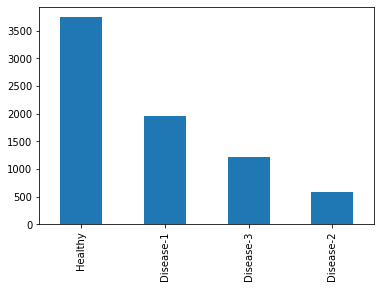

In [8]:
# Check Disease breakdown
pd.value_counts(df['disease']).plot.bar()
# Looks like there is a lot of Healthy in the data compared to the other target values

## Modelling

In [1]:
# Use two different approaches
# Approach 1 will use all variables
# Approach 2 will use some variables using featuring engineering like Extra Classifier
# Approach 3 using pycaret

**Approach 1**

In [63]:
# rescale all variables except the target variable
df_scale = df.loc[:, df.columns!='disease']
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale)
df_scale.reset_index(drop=True, inplace=True)

In [64]:
# combine rescaled value
df['disease'].reset_index(drop=True, inplace=True)
df_1 = pd.concat([df_scale,df['disease']], axis=1)
df_1 = df.columns.values.tolist()
df.shape

(7481, 1095)

In [66]:
#Let's now create our training and test data.
train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape, test.shape)

(5984, 1095) (1497, 1095)


In [ ]:
#!pip install imblearn
#!pip install -U imbalanced-learn

In [67]:
# Fix Target variable imbalance
X_train = train.drop('disease', axis=1)
y_train = train[['disease']]
from imblearn.under_sampling import NearMiss
nr = NearMiss(version=1)
X_train, y_train = nr.fit_resample(X_train, y_train)

In [68]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [69]:
# combine train data
train = pd.concat([X_train,y_train], axis=1)
train.reset_index(drop=True, inplace=True)

In [70]:
train.columns = df.columns.values.tolist()

In [17]:
# Models
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),
                                             ('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')


In [20]:
features=train.iloc[:,0:1094]
target = train['disease']
Name=[]
Accuracy=[]
f1=[]

In [18]:
# Accuracy
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f for model %s" % (scores.mean(),label))

Accuracy: 0.298933 of model Logistic Regression
Accuracy: 0.620028 of model Naive Bayes
Accuracy: 0.688134 of model Random Forest
Accuracy: 0.712364 of model Gradient Boosting
Accuracy: 0.500206 of model KNN
Accuracy: 0.534377 of model Decision Tree
Accuracy: 0.569926 of model LDA
Accuracy: 0.617189 of model Bagging Classifier
Accuracy: 0.717439 of model Ensemble


In [22]:
# F1 score - Metrics of Scoring
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='f1_weighted')
    f1.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("F1: %f for model %s" % (scores.mean(),label))

F1: 0.173434 of model Logistic Regression
F1: 0.607170 of model Naive Bayes
F1: 0.684840 of model Random Forest
F1: 0.704129 of model Gradient Boosting
F1: 0.481226 of model KNN
F1: 0.535794 of model Decision Tree
F1: 0.551130 of model LDA
F1: 0.630484 of model Bagging Classifier
F1: 0.712557 of model Ensemble


In [29]:
# Prediction
X_test = test.drop('disease', axis=1)
Y_test = test[['disease']]

In [31]:
# Cohen’s kappa - Metrics of Scoring
warnings.simplefilter(action='ignore')
cohen = []
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cohen = cohen_kappa_score(Y_test, y_pred)
  Name.append(model.__class__.__name__)
  print("Cohen Kappa Score: %f for model %s" % (cohen,label))


Cohen Kappa Score: 0.125919 for model Logistic Regression
Cohen Kappa Score: 0.219301 for model Naive Bayes
Cohen Kappa Score: 0.371820 for model Random Forest
Cohen Kappa Score: 0.395429 for model Gradient Boosting
Cohen Kappa Score: 0.299775 for model KNN
Cohen Kappa Score: 0.256351 for model Decision Tree
Cohen Kappa Score: 0.272939 for model LDA
Cohen Kappa Score: 0.329991 for model Bagging Classifier
Cohen Kappa Score: 0.355695 for model Ensemble


**Approach 2**


In [ ]:
#choose features
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
array = train.values
X = array[:,0:1094]
Y = array[:,1094]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [103]:
column_data = ['Bacteria-52','Bacteria-988','Bacteria-532','Bacteria-614','Bacteria-597','Bacteria-674','Bacteria-521','Bacteria-530','Bacteria-139','Bacteria-1007','Bacteria-578','Bacteria-672','Bacteria-701','Bacteria-984','Bacteria-647','Bacteria-242','Bacteria-520','Bacteria-613','Bacteria-643','Bacteria-232','Bacteria-642','Bacteria-688','Bacteria-940','Bacteria-604','Bacteria-583','Bacteria-451','Bacteria-582','Bacteria-616','Bacteria-588','Bacteria-543','Bacteria-546','Bacteria-711','Bacteria-553','Bacteria-652','Bacteria-609','Bacteria-584','Bacteria-649','Bacteria-650','Bacteria-535','Bacteria-630','Bacteria-622','Bacteria-576','Bacteria-695','Bacteria-181','Bacteria-634','Bacteria-1086','Bacteria-459','Bacteria-683','Bacteria-632','Bacteria-551','Bacteria-455','Bacteria-567','Bacteria-528','Bacteria-1016','Bacteria-549','Bacteria-717','Bacteria-645','Bacteria-511','Bacteria-680','Bacteria-196','Bacteria-694','Bacteria-149','Bacteria-623','Bacteria-648','Bacteria-637','Bacteria-452','Bacteria-884','Bacteria-633','Bacteria-441','Bacteria-644','Bacteria-703','Bacteria-445','Bacteria-635','Bacteria-687','Bacteria-580','Bacteria-636','Bacteria-187','Bacteria-533','Bacteria-195','Bacteria-430','Bacteria-222','Bacteria-456','Bacteria-40','Bacteria-468','Bacteria-631','Bacteria-945','Bacteria-608','Bacteria-655','Bacteria-536','Bacteria-143','Bacteria-216','Bacteria-581','Bacteria-217','Bacteria-568','Bacteria-585','Bacteria-885','Bacteria-488','Bacteria-507','Bacteria-1073','Bacteria-60','Bacteria-407','Bacteria-571','Bacteria-221','Bacteria-559','Bacteria-529','Bacteria-517','Bacteria-591','Bacteria-602','Bacteria-626','Bacteria-188','Bacteria-2','Bacteria-592','Bacteria-524','Bacteria-948','Bacteria-579','Bacteria-641','Bacteria-1','Bacteria-610','Bacteria-475','Bacteria-157','Bacteria-495','Bacteria-661','Bacteria-715','Bacteria-214','Bacteria-486','Bacteria-504','Bacteria-503','Bacteria-489','Bacteria-607','Bacteria-421','Bacteria-540','Bacteria-639','Bacteria-846','Bacteria-547','Bacteria-151','Bacteria-450','Bacteria-572','Bacteria-573','Bacteria-562','Bacteria-669','Bacteria-682','Bacteria-290','Bacteria-640','Bacteria-395','Bacteria-478','Bacteria-611','Bacteria-210','Bacteria-479','Bacteria-229','Bacteria-600','Bacteria-665','Bacteria-606','Bacteria-154','Bacteria-477','disease']


In [107]:
df1 = df[column_data]

In [109]:
# rescale all variables except the target variable
df_scale = df1.loc[:, df1.columns!='disease']
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale)
df_scale.reset_index(drop=True, inplace=True)
# combine rescaled value
df1['disease'].reset_index(drop=True, inplace=True)
df_1 = pd.concat([df_scale,df1['disease']], axis=1)
df_1.columns = df1.columns.values.tolist()

In [111]:
# Fix Imbalance
train,test = train_test_split(df_1,test_size=0.2,random_state=42)
print(train.shape, test.shape)
X_train = train.drop('disease', axis=1)
y_train = train[['disease']]
from imblearn.under_sampling import NearMiss
nr = NearMiss(version=1)
X_train, y_train = nr.fit_resample(X_train, y_train)

(5984, 155) (1497, 155)


In [112]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
# combine train data
train = pd.concat([X_train,y_train], axis=1)
train.reset_index(drop=True, inplace=True)
train.columns = df1.columns.values.tolist()

In [113]:
features=train.iloc[:,0:154]

In [114]:
# Accuracy
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f for model %s" % (scores.mean(),label))

Accuracy: 0.293266 for model Logistic Regression
Accuracy: 0.497288 for model Naive Bayes
Accuracy: 0.636305 for model Random Forest
Accuracy: 0.627859 for model Gradient Boosting
Accuracy: 0.451765 for model KNN
Accuracy: 0.482018 for model Decision Tree
Accuracy: 0.533907 for model LDA
Accuracy: 0.582811 for model Bagging Classifier
Accuracy: 0.632369 for model Ensemble


In [115]:
# F1 score - Metrics of Scoring
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='f1_weighted')
    f1.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("F1: %f for model %s" % (scores.mean(),label))

F1: 0.160802 for model Logistic Regression
F1: 0.456620 for model Naive Bayes
F1: 0.626431 for model Random Forest
F1: 0.616158 for model Gradient Boosting
F1: 0.438866 for model KNN
F1: 0.474634 for model Decision Tree
F1: 0.506355 for model LDA
F1: 0.575123 for model Bagging Classifier
F1: 0.618451 for model Ensemble


In [116]:
# Cohen
X_test = test.drop('disease', axis=1)
Y_test = test[['disease']]
warnings.simplefilter(action='ignore')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cohen = cohen_kappa_score(Y_test, y_pred)
  Name.append(model.__class__.__name__)
  print("Cohen Kappa Score: %f for model %s" % (cohen,label))

Cohen Kappa Score: 0.073639 for model Logistic Regression
Cohen Kappa Score: 0.116997 for model Naive Bayes
Cohen Kappa Score: 0.241563 for model Random Forest
Cohen Kappa Score: 0.252727 for model Gradient Boosting
Cohen Kappa Score: 0.191861 for model KNN
Cohen Kappa Score: 0.201691 for model Decision Tree
Cohen Kappa Score: 0.188096 for model LDA
Cohen Kappa Score: 0.203915 for model Bagging Classifier
Cohen Kappa Score: 0.227569 for model Ensemble


### Approach 3

In [1]:
# Libraries
from pycaret.classification import *
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

In [7]:
#!pip install imblearn
#!pip install -U imbalanced-learn

In [3]:
# Load data
df = pd.read_csv('challenge_1_gut_microbiome_data.csv')

In [4]:
df.head()

,Samples,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,Bacteria-11,Bacteria-12,Bacteria-13,Bacteria-14,Bacteria-15,Bacteria-16,Bacteria-17,Bacteria-18,Bacteria-19,Bacteria-20,Bacteria-21,Bacteria-22,Bacteria-23,Bacteria-24,Bacteria-25,Bacteria-26,Bacteria-27,Bacteria-28,Bacteria-29,Bacteria-30,Bacteria-31,Bacteria-32,Bacteria-33,Bacteria-34,Bacteria-35,Bacteria-36,Bacteria-37,Bacteria-38,Bacteria-39,Bacteria-40,Bacteria-41,Bacteria-42,Bacteria-43,Bacteria-44,Bacteria-45,Bacteria-46,Bacteria-47,Bacteria-48,Bacteria-49,Bacteria-50,Bacteria-51,Bacteria-52,Bacteria-53,Bacteria-54,Bacteria-55,Bacteria-56,Bacteria-57,Bacteria-58,Bacteria-59,Bacteria-60,Bacteria-61,Bacteria-62,Bacteria-63,Bacteria-64,Bacteria-65,Bacteria-66,Bacteria-67,Bacteria-68,Bacteria-69,Bacteria-70,Bacteria-71,Bacteria-72,Bacteria-73,Bacteria-74,Bacteria-75,Bacteria-76,Bacteria-77,Bacteria-78,Bacteria-79,Bacteria-80,Bacteria-81,Bacteria-82,Bacteria-83,Bacteria-84,Bacteria-85,Bacteria-86,Bacteria-87,Bacteria-88,Bacteria-89,Bacteria-90,Bacteria-91,Bacteria-92,Bacteria-93,Bacteria-94,Bacteria-95,Bacteria-96,Bacteria-97,Bacteria-98,Bacteria-99,Bacteria-100,Bacteria-101,Bacteria-102,Bacteria-103,Bacteria-104,Bacteria-105,Bacteria-106,Bacteria-107,Bacteria-108,Bacteria-109,Bacteria-110,Bacteria-111,Bacteria-112,Bacteria-113,Bacteria-114,Bacteria-115,Bacteria-116,Bacteria-117,Bacteria-118,Bacteria-119,Bacteria-120,Bacteria-121,Bacteria-122,Bacteria-123,Bacteria-124,Bacteria-125,Bacteria-126,Bacteria-127,Bacteria-128,Bacteria-129,Bacteria-130,Bacteria-131,Bacteria-132,Bacteria-133,Bacteria-134,Bacteria-135,Bacteria-136,Bacteria-137,Bacteria-138,Bacteria-139,Bacteria-140,Bacteria-141,Bacteria-142,Bacteria-143,Bacteria-144,Bacteria-145,Bacteria-146,Bacteria-147,Bacteria-148,Bacteria-149,Bacteria-150,Bacteria-151,Bacteria-152,Bacteria-153,Bacteria-154,Bacteria-155,Bacteria-156,Bacteria-157,Bacteria-158,Bacteria-159,Bacteria-160,Bacteria-161,Bacteria-162,Bacteria-163,Bacteria-164,Bacteria-165,Bacteria-166,Bacteria-167,Bacteria-168,Bacteria-169,Bacteria-170,Bacteria-171,Bacteria-172,Bacteria-173,Bacteria-174,Bacteria-175,Bacteria-176,Bacteria-177,Bacteria-178,Bacteria-179,Bacteria-180,Bacteria-181,Bacteria-182,Bacteria-183,Bacteria-184,Bacteria-185,Bacteria-186,Bacteria-187,Bacteria-188,Bacteria-189,Bacteria-190,Bacteria-191,Bacteria-192,Bacteria-193,Bacteria-194,Bacteria-195,Bacteria-196,Bacteria-197,Bacteria-198,Bacteria-199,Bacteria-200,Bacteria-201,Bacteria-202,Bacteria-203,Bacteria-204,Bacteria-205,Bacteria-206,Bacteria-207,Bacteria-208,Bacteria-209,Bacteria-210,Bacteria-211,Bacteria-212,Bacteria-213,Bacteria-214,Bacteria-215,Bacteria-216,Bacteria-217,Bacteria-218,Bacteria-219,Bacteria-220,Bacteria-221,Bacteria-222,Bacteria-223,Bacteria-224,Bacteria-225,Bacteria-226,Bacteria-227,Bacteria-228,Bacteria-229,Bacteria-230,Bacteria-231,Bacteria-232,Bacteria-233,Bacteria-234,Bacteria-235,Bacteria-236,Bacteria-237,Bacteria-238,Bacteria-239,Bacteria-240,Bacteria-241,Bacteria-242,Bacteria-243,Bacteria-244,Bacteria-245,Bacteria-246,Bacteria-247,Bacteria-248,Bacteria-249,...,Bacteria-846,Bacteria-847,Bacteria-848,Bacteria-849,Bacteria-850,Bacteria-851,Bacteria-852,Bacteria-853,Bacteria-854,Bacteria-855,Bacteria-856,Bacteria-857,Bacteria-858,Bacteria-859,Bacteria-860,Bacteria-861,Bacteria-862,Bacteria-863,Bacteria-864,Bacteria-865,Bacteria-866,Bacteria-867,Bacteria-868,Bacteria-869,Bacteria-870,Bacteria-871,Bacteria-872,Bacteria-873,Bacteria-874,Bacteria-875,Bacteria-876,Bacteria-877,Bacteria-878,Bacteria-879,Bacteria-880,Bacteria-881,Bacteria-882,Bacteria-883,Bacteria-884,Bacteria-885,Bacteria-886,Bacteria-887,Bacteria-888,Bacteria-889,Bacteria-890,Bacteria-891,Bacteria-892,Bacteria-893,Bacteria-894,Bacteria-895,Bacteria-896,Bacteria-897,Bacteria-898,Bacteria-899,Bacteria-900,Bacteria-901,Bacteria-902,Bacteria-903,Bacteria-904,Bacteria-905,Bacteria-906,Bacteria-907,Bacteria-908,Bacteria-909,Bacteria-910,Bacteria-911,

In [5]:
# Drop first column
df.drop('Samples', axis=1, inplace=True)

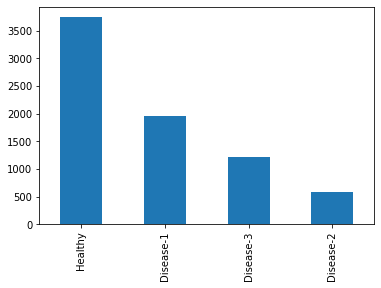

In [6]:
# Check Disease breakdown
pd.value_counts(df['disease']).plot.bar()
# Looks like there is a lot of Healthy in the data compared to the other target values

In [7]:
# Categorize disease
df["disease"] = df["disease"].astype('category')
df["disease"] = df["disease"].cat.codes

In [8]:
# rescale all variables except the target variable
df_scale = df.loc[:, df.columns!='disease']
scaler = preprocessing.MinMaxScaler()
df_scale = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale)
df_scale.reset_index(drop=True, inplace=True)

In [9]:
# combine rescaled value
df['disease'].reset_index(drop=True, inplace=True)
df_1 = pd.concat([df_scale,df['disease']], axis=1)
df_1 = df.columns.values.tolist()
df.shape

(7481, 1095)

In [10]:
#Let's now create our training and test data.
train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape, test.shape)

(5984, 1095) (1497, 1095)


In [11]:
# Fix Target variable imbalance
X_train = train.drop('disease', axis=1)
y_train = train[['disease']]
from imblearn.under_sampling import NearMiss
nr = NearMiss(version=1)
X_train, y_train = nr.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

# combine train data
train = pd.concat([X_train,y_train], axis=1)
train.reset_index(drop=True, inplace=True)

In [12]:
train.head()

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,Bacteria-11,Bacteria-12,Bacteria-13,Bacteria-14,Bacteria-15,Bacteria-16,Bacteria-17,Bacteria-18,Bacteria-19,Bacteria-20,Bacteria-21,Bacteria-22,Bacteria-23,Bacteria-24,Bacteria-25,Bacteria-26,Bacteria-27,Bacteria-28,Bacteria-29,Bacteria-30,Bacteria-31,Bacteria-32,Bacteria-33,Bacteria-34,Bacteria-35,Bacteria-36,Bacteria-37,Bacteria-38,Bacteria-39,Bacteria-40,Bacteria-41,Bacteria-42,Bacteria-43,Bacteria-44,Bacteria-45,Bacteria-46,Bacteria-47,Bacteria-48,Bacteria-49,Bacteria-50,Bacteria-51,Bacteria-52,Bacteria-53,Bacteria-54,Bacteria-55,Bacteria-56,Bacteria-57,Bacteria-58,Bacteria-59,Bacteria-60,Bacteria-61,Bacteria-62,Bacteria-63,Bacteria-64,Bacteria-65,Bacteria-66,Bacteria-67,Bacteria-68,Bacteria-69,Bacteria-70,Bacteria-71,Bacteria-72,Bacteria-73,Bacteria-74,Bacteria-75,Bacteria-76,Bacteria-77,Bacteria-78,Bacteria-79,Bacteria-80,Bacteria-81,Bacteria-82,Bacteria-83,Bacteria-84,Bacteria-85,Bacteria-86,Bacteria-87,Bacteria-88,Bacteria-89,Bacteria-90,Bacteria-91,Bacteria-92,Bacteria-93,Bacteria-94,Bacteria-95,Bacteria-96,Bacteria-97,Bacteria-98,Bacteria-99,Bacteria-100,Bacteria-101,Bacteria-102,Bacteria-103,Bacteria-104,Bacteria-105,Bacteria-106,Bacteria-107,Bacteria-108,Bacteria-109,Bacteria-110,Bacteria-111,Bacteria-112,Bacteria-113,Bacteria-114,Bacteria-115,Bacteria-116,Bacteria-117,Bacteria-118,Bacteria-119,Bacteria-120,Bacteria-121,Bacteria-122,Bacteria-123,Bacteria-124,Bacteria-125,Bacteria-126,Bacteria-127,Bacteria-128,Bacteria-129,Bacteria-130,Bacteria-131,Bacteria-132,Bacteria-133,Bacteria-134,Bacteria-135,Bacteria-136,Bacteria-137,Bacteria-138,Bacteria-139,Bacteria-140,Bacteria-141,Bacteria-142,Bacteria-143,Bacteria-144,Bacteria-145,Bacteria-146,Bacteria-147,Bacteria-148,Bacteria-149,Bacteria-150,Bacteria-151,Bacteria-152,Bacteria-153,Bacteria-154,Bacteria-155,Bacteria-156,Bacteria-157,Bacteria-158,Bacteria-159,Bacteria-160,Bacteria-161,Bacteria-162,Bacteria-163,Bacteria-164,Bacteria-165,Bacteria-166,Bacteria-167,Bacteria-168,Bacteria-169,Bacteria-170,Bacteria-171,Bacteria-172,Bacteria-173,Bacteria-174,Bacteria-175,Bacteria-176,Bacteria-177,Bacteria-178,Bacteria-179,Bacteria-180,Bacteria-181,Bacteria-182,Bacteria-183,Bacteria-184,Bacteria-185,Bacteria-186,Bacteria-187,Bacteria-188,Bacteria-189,Bacteria-190,Bacteria-191,Bacteria-192,Bacteria-193,Bacteria-194,Bacteria-195,Bacteria-196,Bacteria-197,Bacteria-198,Bacteria-199,Bacteria-200,Bacteria-201,Bacteria-202,Bacteria-203,Bacteria-204,Bacteria-205,Bacteria-206,Bacteria-207,Bacteria-208,Bacteria-209,Bacteria-210,Bacteria-211,Bacteria-212,Bacteria-213,Bacteria-214,Bacteria-215,Bacteria-216,Bacteria-217,Bacteria-218,Bacteria-219,Bacteria-220,Bacteria-221,Bacteria-222,Bacteria-223,Bacteria-224,Bacteria-225,Bacteria-226,Bacteria-227,Bacteria-228,Bacteria-229,Bacteria-230,Bacteria-231,Bacteria-232,Bacteria-233,Bacteria-234,Bacteria-235,Bacteria-236,Bacteria-237,Bacteria-238,Bacteria-239,Bacteria-240,Bacteria-241,Bacteria-242,Bacteria-243,Bacteria-244,Bacteria-245,Bacteria-246,Bacteria-247,Bacteria-248,Bacteria-249,Bacteria-250,...,Bacteria-846,Bacteria-847,Bacteria-848,Bacteria-849,Bacteria-850,Bacteria-851,Bacteria-852,Bacteria-853,Bacteria-854,Bacteria-855,Bacteria-856,Bacteria-857,Bacteria-858,Bacteria-859,Bacteria-860,Bacteria-861,Bacteria-862,Bacteria-863,Bacteria-864,Bacteria-865,Bacteria-866,Bacteria-867,Bacteria-868,Bacteria-869,Bacteria-870,Bacteria-871,Bacteria-872,Bacteria-873,Bacteria-874,Bacteria-875,Bacteria-876,Bacteria-877,Bacteria-878,Bacteria-879,Bacteria-880,Bacteria-881,Bacteria-882,Bacteria-883,Bacteria-884,Bacteria-885,Bacteria-886,Bacteria-887,Bacteria-888,Bacteria-889,Bacteria-890,Bacteria-891,Bacteria-892,Bacteria-893,Bacteria-894,Bacteria-895,Bacteria-896,Bacteria-897,Bacteria-898,Bacteria-899,Bacteria-900,Bacteria-901,Bacteria-902,Bacteria-903,Bacteria-904,Bacteria-905,Bacteria-906,Bacteria-907,Bacteria-908,Bacteria-909,Bacteria-910,Bacteria

In [13]:
exp_class101 = setup(data = train, target = 'disease', session_id=123) 

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.0.2. Support for newer scikit-learn versions will be added in a future release.

In [ ]:
best = compare_models()

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

In [ ]:
predict_model(tuned_lightgbm);

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
final_lightgbm

In [ ]:
save_model(final_lightgbm,'Final lightgbm')

In [ ]:
saved_final_lightgbm = load_model('Final lightgbm')

In [ ]:
# Accuracy

#F1 score - Metrics of Scoring

# Prediction

# Cohen’s kappa - Metrics of Scoring
warnings.simplefilter(action='ignore')
cohen = []
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], 
                        ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cohen = cohen_kappa_score(Y_test, y_pred)
  Name.append(model.__class__.__name__)
  print("Cohen Kappa Score: %f for model %s" % (cohen,label))